[BernoulliRBM] Iteration 1, pseudo-likelihood = -25.39, time = 0.22s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -23.77, time = 0.30s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -22.94, time = 0.30s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -21.91, time = 0.29s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -21.69, time = 0.27s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -21.06, time = 0.32s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -20.89, time = 0.26s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -20.64, time = 0.29s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -20.36, time = 0.26s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -20.19, time = 0.27s
Logistic regression using RBM features:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       174
           1       0.92      0.92      0.92       184
           2       0.93      0.96      0.94       166
           3       0.94      0.88      0.91       19

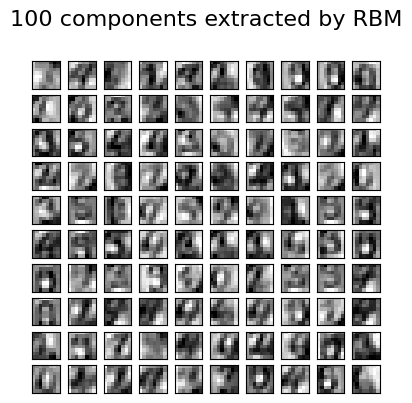

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.ndimage import convolve
from sklearn import linear_model, datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.base import clone


# #############################################################################
# Setting up

def nudge_dataset(X, Y):
    """
    This produces a dataset 5 times bigger than the original one,
    by moving the 8x8 images in X around by 1px to left, right, down, up
    """
    direction_vectors = [
        [[0, 1, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [1, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 1],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 1, 0]]]

    def shift(x, w):
        return convolve(x.reshape((8, 8)), mode='constant', weights=w).ravel()

    X = np.concatenate([X] +
                       [np.apply_along_axis(shift, 1, X, vector)
                        for vector in direction_vectors])
    Y = np.concatenate([Y for _ in range(5)], axis=0)
    return X, Y


# Load Data
X, y = datasets.load_digits(return_X_y=True)
X = np.asarray(X, 'float32')
X, Y = nudge_dataset(X, y)
X = (X - np.min(X, 0)) / (np.max(X, 0) + 0.0001)  # 0-1 scaling

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=0)

# Models we will use
logistic = linear_model.LogisticRegression(solver='newton-cg', tol=1)
rbm = BernoulliRBM(random_state=0, verbose=True)

rbm_features_classifier = Pipeline(
    steps=[('rbm', rbm), ('logistic', logistic)])

# #############################################################################
# Training

# Hyper-parameters. These were set by cross-validation,
# using a GridSearchCV. Here we are not performing cross-validation to
# save time.
rbm.learning_rate = 0.06
rbm.n_iter = 10
# More components tend to give better prediction performance, but larger
# fitting time
rbm.n_components = 100
logistic.C = 6000

# Training RBM-Logistic Pipeline
rbm_features_classifier.fit(X_train, Y_train)

# Training the Logistic regression classifier directly on the pixel
raw_pixel_classifier = clone(logistic)
raw_pixel_classifier.C = 100.
raw_pixel_classifier.fit(X_train, Y_train)

# #############################################################################
# Evaluation

Y_pred = rbm_features_classifier.predict(X_test)
print("Logistic regression using RBM features:\n%s\n" % (
    metrics.classification_report(Y_test, Y_pred)))

Y_pred = raw_pixel_classifier.predict(X_test)
print("Logistic regression using raw pixel features:\n%s\n" % (
    metrics.classification_report(Y_test, Y_pred)))

# #############################################################################
# Plotting

plt.figure(figsize=(4.2, 4))
for i, comp in enumerate(rbm.components_):
    plt.subplot(10, 10, i + 1)
    plt.imshow(comp.reshape((8, 8)), cmap=plt.cm.gray_r,
               interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
plt.suptitle('100 components extracted by RBM', fontsize=16)
plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)

plt.show()

In [2]:
"""
Using MNIST, compare classification performance of:
1) logistic regression by itself,
2) logistic regression on outputs of an RBM, and
3) logistic regression on outputs of a stacks of RBMs / a DBN.
"""

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import BernoulliRBM
from sklearn.base import clone
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.neural_network import MLPClassifier

In [3]:
X, Y = datasets.load_digits(return_X_y=True)
X = X.astype(float)
X = X - X.min()
X = X / X.max()

# split into train, validation, and test data sets
X_train, X_test, Y_train, Y_test = train_test_split(X,       Y,       test_size=0.2, random_state=0)
X_train, X_val,  Y_train, Y_val  = train_test_split(X_train, Y_train, test_size=0.2, random_state=0)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -25.56, time = 0.32s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -26.11, time = 0.35s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -25.14, time = 0.33s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -25.83, time = 0.35s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -25.85, time = 0.38s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -25.30, time = 0.44s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -25.52, time = 0.46s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -25.64, time = 0.45s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -24.48, time = 0.38s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -25.10, time = 0.33s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -27.02, time = 0.38s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -25.13, time = 0.30s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -24.03, time = 0.30s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -25.24, time = 0.29s
[BernoulliRBM] Iteration 15, 

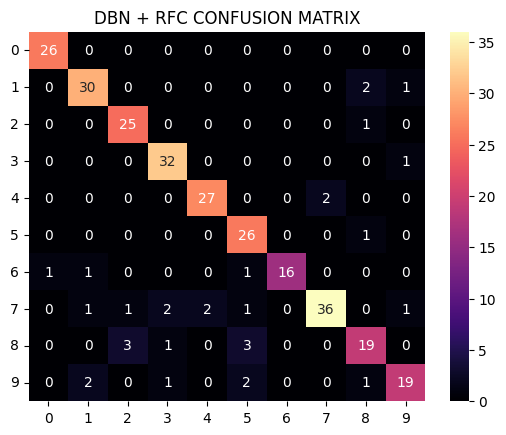

In [5]:
# --------------------------------------------------------------------------------
# set hyperparameters

learning_rate = 0.02 # from Erhan et el. (2010): median value in grid-search
total_units   =  800 # from Erhan et el. (2010): optimal for MNIST / only slightly worse than 1200 units when using InfiniteMNIST
total_epochs  =   50 # from Erhan et el. (2010): optimal for MNIST
batch_size    =  128 # seems like a representative sample; backprop literature often uses 256 or 512 samples

C = 100. # optimum for benchmark model according to sklearn docs: https://scikit-learn.org/stable/auto_examples/neural_networks/plot_rbm_logistic_classification.html#sphx-glr-auto-examples-neural-networks-plot-rbm-logistic-classification-py)

# TODO optimize using grid search, etc

# --------------------------------------------------------------------------------
# construct models

# RBM
rbm = BernoulliRBM(n_components=total_units, learning_rate=learning_rate, batch_size=batch_size, n_iter=total_epochs, verbose=1)

# "output layer"
logistic = LogisticRegression(C=C, solver='newton-cg', multi_class='multinomial', max_iter=200, verbose=1)
r_forest = RandomForestClassifier()
ml_classif = MLPClassifier()


models = []
model_names = [
    #"Logistic Base", 
    #"RBM + Logistic", 
    #"DBN + Logistic",
    "DBN + RFC"]
#models.append(Pipeline(steps=[('logistic', clone(logistic))]))                                              # base model / benchmark
#models.append(Pipeline(steps=[('rbm1', clone(rbm)), ('logistic', clone(logistic))]))                        # single RBM
#models.append(Pipeline(steps=[('rbm1', clone(rbm)), ('rbm2', clone(rbm)), ('logistic1', clone(logistic))]))  # RBM stack / DBN
models.append(Pipeline(steps=[('rbm1', clone(rbm)), ('rbm2', clone(rbm)), ('rfc', clone(r_forest))]))           # RBM stack / RANDOM FOREST

# --------------------------------------------------------------------------------
# train and evaluate models

for model, mn in zip(models, model_names):
    # train
    model.fit(X_train, Y_train)
    print(mn + " PERFORMANCE")

    # evaluate using validation set
    #print("Model performance:\n%s\n" % (classification_report(Y_val, model.predict(X_val))))

    print("Model Accuracy: " ,accuracy_score(Y_val, model.predict(X_val)))
    CM = confusion_matrix(model.predict(X_val), Y_val)
    
    ax = plt.subplot()
    ax.set_title(mn + " CONFUSION MATRIX")
    sns.heatmap(CM, annot=True, cmap="magma", ax=ax, fmt='d')
    plt.yticks(rotation=0)

    plt.show()

# TODO: after parameter optimization, evaluate on test set